# ルースの方法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

平面ケプラー問題
$$
H(q, p) = \frac{1}{2}|p|^2 - \frac{1}{|q|} = T(p) + U(q),\\
\nabla_p H = \nabla_p T = p,\\
\nabla_q H = \nabla_q U = \frac{q}{|q|^3},\\
$$

In [2]:
def dT(p):
    return p

def dU(q):
    r = np.hypot(q[0],q[1])
    return q / r**3

In [3]:
def Ruth(t, q, p, dT, dU, h):
    Q1 = q + 7 * h * dT(p) / 24
    P1 = p - 2 * h * dU(Q1) / 3
    Q1 = Q1 + 0.75 * h * dT(P1)
    P1 = P1 + 2 * h * dU(Q1) / 3
    Q1 = Q1 - h * dT(P1) / 24
    P1 = P1 - h * dU(Q1)
    return [Q1, P1]

数値計算

In [4]:
q0 = np.array([1.0, 1.0])
p0 = np.array([0.0, 1.0])
a = 0.0 # 初期時刻
h = 0.01
N = 10000
b = a + N * h

In [5]:
t = a
Q,P = [q0], [p0]
q,p = q0, p0
for n in range(1,N+1):
    t = a + n * h
    q,p = Ruth(t, q, p, dT, dU, h)
    Q.append(q)
    P.append(p)

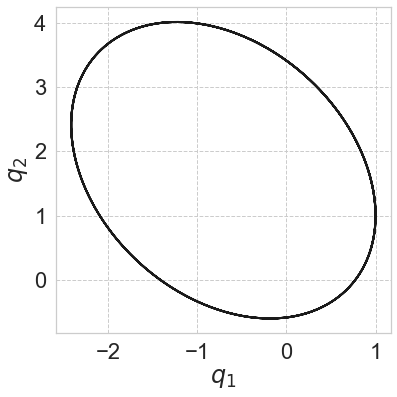

In [6]:
QQ = np.array(Q)
PP = np.array(P)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlabel("$q_1$")
ax.set_ylabel("$q_2$")
ax.plot(QQ[:,0], QQ[:,1], '-k')
# plt.savefig("kepler_orbit.pdf", bbox_inches="tight")

ハミルトニアン
$$
H(q, p) = \frac{1}{2} q^2 - \frac{1}{4}q^4 + \frac{1}{2} p^2
$$

In [7]:
def dT(p):
    return p

def dU(q):
    return q * (1 - q * q)

q0 = 0.0
p0 = np.sqrt(0.5)

In [8]:
a = 0.0 # 初期時刻
b = 1.0 # 最終時刻
N = 1000
h = (b-a)/N

In [9]:
t = a
Q,P = [q0], [p0]
q,p = q0, p0
for n in range(1,N+1):
    t = a + n * h
    q,p = Ruth(t, q, p, dT, dU, h)
    Q.append(q)
    P.append(p)

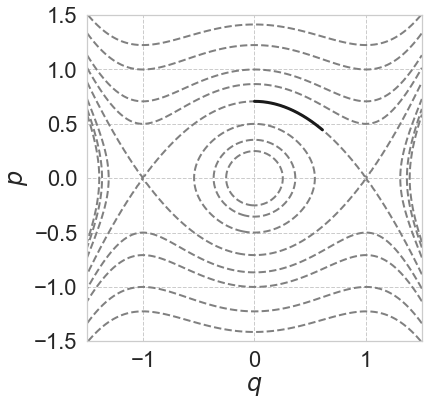

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlabel("$q$")
ax.set_ylabel("$p$")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
HH = [0.125, 0.25, 0.375, 0.5]
x = np.linspace(-1.5,1.5,128)
y = np.linspace(-1.5,1.5,128)
X, Y = np.meshgrid(x, y)
Z = 0.5*Y**2+0.5*X**2-0.25*X**4
ax.contour(X, Y, Z, levels=[0.03125,0.0625,0.125, 0.25,0.375,0.5, 0.75, 1.0], linestyles=['dashed'],colors=['grey'])
ax.plot(Q, P, '-k', linewidth=3.0)
# plt.savefig("hamiltonian_orbit.pdf", bbox_inches="tight")